## Explore the Data Observatory catalog

The Data Observatory is a a spatial data platform that enables Data Scientists to augment their data and broaden their analysis. It offers a wide range of datasets from around the globe in a spatial data repository.

This guide is intended for those who are going to start augmenting their own data using CARTOframes and are willing to explore our public Data Observatory catalog on the seek of the datasets that best fit their use cases and analyses.

**Note: The catalog is public and you don't need a CARTO account to search for available datasets**

### Looking for population data in the US in the catalog

In this guide we are going to filter the Data Observatory catalog looking for population data in the US.

The catalog is comprised of thousands of curated spatial datasets, so when searching for
data the easiest way to find out what you are looking for is make use of a feceted search. A faceted (or hierarchical) search allows you to narrow down search results by applying multiple filters based on faceted classification of the catalog datasets.

Datasets are organized in three main hirearchies:

- Country
- Category
- Geography (or spatial resolution)

For our analysis we are looking for a demographics dataset in the US with a spatial resolution at the level of block groups. 

First we can start for discovering which available geographies (orspatial resolutions) we have for demographics data in the US, by filtering the `catalog` by `country` and `category` and listing the available `geographies`.

Let's start exploring the available categories of data for the US:

In [40]:
from cartoframes.data.observatory import Catalog
Catalog().country('usa').categories

[<Category.get('road_traffic')>,
 <Category.get('points_of_interest')>,
 <Category.get('human_mobility')>,
 <Category.get('financial')>,
 <Category.get('environmental')>,
 <Category.get('demographics')>]

For the case of the US, the Data Observatory provides six different categories of datasets. Let's discover the available spatial resolutions for the demographics category (which at a first sight will contain the population data we need).

In [43]:
from cartoframes.data.observatory import Catalog
geographies = Catalog().country('usa').category('demographics').geographies
geographies

[<Geography.get('ags_blockgroup_1c63771c')>,
 <Geography.get('ags_q17_4739be4f')>,
 <Geography.get('mbi_blockgroups_1ab060a')>,
 <Geography.get('mbi_counties_141b61cd')>,
 <Geography.get('mbi_county_subd_e8e6ea23')>,
 <Geography.get('mbi_pc_5_digit_4b1682a6')>,
 <Geography.get('od_blockclippe_9c508438')>,
 <Geography.get('od_blockgroupc_3ab29c84')>,
 <Geography.get('od_cbsaclipped_b6a32adc')>,
 <Geography.get('od_censustract_5962fe30')>,
 <Geography.get('od_congression_6774ebb')>,
 <Geography.get('od_countyclipp_caef1ec9')>,
 <Geography.get('od_placeclippe_48a89947')>,
 <Geography.get('od_pumaclipped_b065909')>,
 <Geography.get('od_schooldistr_6d5c417f')>,
 <Geography.get('od_schooldistr_f70c7e28')>,
 <Geography.get('od_schooldistr_75493a16')>,
 <Geography.get('od_stateclippe_8d79f5be')>,
 <Geography.get('od_zcta5clippe_6b6ff33c')>,
 <Geography.get('usct_censustract_784cc2ed')>]

Let's filter the geographies by those that contain information at the level of blockgroup. For that purpose we are converting the geographies to a pandas `DataFrame` and search for the string `blockgroup` in the `id` of the geographies:

In [44]:
df = geographies.to_dataframe()
df[df['id'].str.contains('blockgroup', case=False, na=False)]

available_in country_id                                        description  \
0         [bq]        usa                                               None   
2         None        usa  MBI Digital Boundaries for USA at Blockgroups ...   
7         None        usa                                               None   

                                       geom_coverage     geom_type  \
0  0106000020E61000000800000001030000000100000009...  MULTIPOLYGON   
2  01060000005A0100000103000000010000002900000013...  MULTIPOLYGON   
7  0106000020E61000000800000001030000000100000009...  MULTIPOLYGON   

                                                  id  is_public_data lang  \
0         carto-do.ags.geography_usa_blockgroup_2015           False  eng   
2        carto-do.mbi.geography_usa_blockgroups_2019           False  eng   
7  carto-do-public-data.tiger.geography_usa_block...            True  eng   

                                                name provider_id  \
0                             USA Census Block Group         ags   
2                                  USA - Blockgroups         mbi   
7  Topologically Integrated Geographic Encoding a...   open_data   

                  provider_name                     slug summary_json  \
0  Applied Geographic Solutions  ags_blockgroup_1c63771c         None   
2   Michael Bauer International  mbi_blockgroups_1ab060a         None   
7                     Open Data  od_blockgroupc_3ab29c84         None   

  update_frequency version  
0             None    2015  
2             None    2019  
7             None    2015

We have three available datasets, from three different providers: Michael Bauer International, Open Data and AGS. For this example, we are going to look for demographic datasets for the AGS blockgroups geography `ags_blockgroup_1c63771c`:

In [45]:
datasets = Catalog().country('usa').category('demographics').geography('ags_blockgroup_1c63771c').datasets
datasets

[<Dataset.get('ags_sociodemogr_e92b1637')>,
 <Dataset.get('ags_consumerspe_fe5d060a')>,
 <Dataset.get('ags_retailpoten_ddf56a1a')>,
 <Dataset.get('ags_consumerpro_e8344e2e')>,
 <Dataset.get('ags_businesscou_a8310a11')>,
 <Dataset.get('ags_crimerisk_9ec89442')>]

In [46]:
datasets.to_dataframe()

available_in   category_id category_name country_id    data_source_id  \
0         [bq]  demographics  Demographics        usa  sociodemographic   
1         [bq]  demographics  Demographics        usa  consumerspending   
2         [bq]  demographics  Demographics        usa   retailpotential   
3         [bq]  demographics  Demographics        usa  consumerprofiles   
4         [bq]  demographics  Demographics        usa    businesscounts   
5         [bq]  demographics  Demographics        usa         crimerisk   

                                         description geography_description  \
0  Census and ACS sociodemographic data estimated...                  None   
1  The Consumer Expenditure database consists of ...                  None   
2  The retail potential database consists of aver...                  None   
3  Segmentation of the population in sixty-eight ...                  None   
4  Business Counts database is a geographic summa...                  None   
5  Using advanced statistical methodologies and a...                  None   

                                 geography_id          geography_name  \
0  carto-do.ags.geography_usa_blockgroup_2015  USA Census Block Group   
1  carto-do.ags.geography_usa_blockgroup_2015  USA Census Block Group   
2  carto-do.ags.geography_usa_blockgroup_2015  USA Census Block Group   
3  carto-do.ags.geography_usa_blockgroup_2015  USA Census Block Group   
4  carto-do.ags.geography_usa_blockgroup_2015  USA Census Block Group   
5  carto-do.ags.geography_usa_blockgroup_2015  USA Census Block Group   

                                                  id  ...  lang  \
0  carto-do.ags.demographics_sociodemographic_usa...  ...   eng   
1  carto-do.ags.demographics_consumerspending_usa...  ...   eng   
2  carto-do.ags.demographics_retailpotential_usa_...  ...   eng   
3  carto-do.ags.demographics_consumerprofiles_usa...  ...   eng   
4  carto-do.ags.demographics_businesscounts_usa_b...  ...   eng   
5  carto-do.ags.demographics_crimerisk_usa_blockg...  ...   eng   

                name provider_id                 provider_name  \
0   Sociodemographic         ags  Applied Geographic Solutions   
1  Consumer Spending         ags  Applied Geographic Solutions   
2   Retail Potential         ags  Applied Geographic Solutions   
3  Consumer Profiles         ags  Applied Geographic Solutions   
4    Business Counts         ags  Applied Geographic Solutions   
5         Crime Risk         ags  Applied Geographic Solutions   

                       slug  \
0  ags_sociodemogr_e92b1637   
1  ags_consumerspe_fe5d060a   
2  ags_retailpoten_ddf56a1a   
3  ags_consumerpro_e8344e2e   
4  ags_businesscou_a8310a11   
5    ags_crimerisk_9ec89442   

                                        summary_json temporal_aggregation  \
0  {'counts': {'rows': 217182, 'cells': 22369746,...               yearly   
1  {'counts': {'rows': 217182, 'cells': 28016478,...               yearly   
2  {'counts': {'rows': 217182, 'cells': 28668024,...               yearly   
3  {'counts': {'rows': 217182, 'cells': 31057026,...               yearly   
4  {'counts': {'rows': 217182, 'cells': 25627476,...               yearly   
5  {'counts': {'rows': 217182, 'cells': 3040548, ...               yearly   

             time_coverage update_frequency version  
0  [2019-01-01,2020-01-01)             None    2019  
1  [2018-01-01,2019-01-01)             None    2018  
2  [2018-01-01,2019-01-01)             None    2018  
3  [2018-01-01,2019-01-01)             None    2018  
4  [2018-01-01,2019-01-01)             None    2018  
5  [2018-01-01,2019-01-01)             None    2018  

[6 rows x 21 columns]

They comprise different information: consumer spending, retail potential, consumer profiles, etc.

At a first sight, it looks the dataset with `data_source_id: sociodemographic` might contain the population information we are looking for. Let's try to understand a little bit better what data this dataset contains by looking at its variables:

In [47]:
from cartoframes.data.observatory import Dataset
dataset = Dataset.get('ags_sociodemogr_e92b1637')
variables = dataset.variables
variables

[<Variable.get('HINCYMED65_310bc888')> #'Median Household Income: Age 65-74 (2019A)',
 <Variable.get('HINCYMED55_1a269b4b')> #'Median Household Income: Age 55-64 (2019A)',
 <Variable.get('HINCYMED45_33daa0a')> #'Median Household Income: Age 45-54 (2019A)',
 <Variable.get('HINCYMED35_4c7c3ccd')> #'Median Household Income: Age 35-44 (2019A)',
 <Variable.get('HINCYMED25_55670d8c')> #'Median Household Income: Age 25-34 (2019A)',
 <Variable.get('HINCYMED24_22603d1a')> #'Median Household Income: Age < 25 (2019A)',
 <Variable.get('HINCYGT200_e552a738')> #'Household Income > $200000 (2019A)',
 <Variable.get('HINCY6075_1933e114')> #'Household Income $60000-$74999 (2019A)',
 <Variable.get('HINCY4550_f7ad7d79')> #'Household Income $45000-$49999 (2019A)',
 <Variable.get('HINCY4045_98177a5c')> #'Household Income $40000-$44999 (2019A)',
 <Variable.get('HINCY3540_73617481')> #'Household Income $35000-$39999 (2019A)',
 <Variable.get('HINCY2530_849c8523')> #'Household Income $25000-$29999 (2019A)',
 <V

In [48]:
from cartoframes.data.observatory import Dataset
vdf = variables.to_dataframe()
vdf

agg_method column_name                                         dataset_id  \
0          AVG  HINCYMED65  carto-do.ags.demographics_sociodemographic_usa...   
1          AVG  HINCYMED55  carto-do.ags.demographics_sociodemographic_usa...   
2          AVG  HINCYMED45  carto-do.ags.demographics_sociodemographic_usa...   
3          AVG  HINCYMED35  carto-do.ags.demographics_sociodemographic_usa...   
4          AVG  HINCYMED25  carto-do.ags.demographics_sociodemographic_usa...   
5          AVG  HINCYMED24  carto-do.ags.demographics_sociodemographic_usa...   
6          AVG  HINCYGT200  carto-do.ags.demographics_sociodemographic_usa...   
7          AVG   HINCY6075  carto-do.ags.demographics_sociodemographic_usa...   
8          AVG   HINCY4550  carto-do.ags.demographics_sociodemographic_usa...   
9          AVG   HINCY4045  carto-do.ags.demographics_sociodemographic_usa...   
10         AVG   HINCY3540  carto-do.ags.demographics_sociodemographic_usa...   
11         AVG   HINCY2530  carto-do.ags.demographics_sociodemographic_usa...   
12         AVG   HINCY2025  carto-do.ags.demographics_sociodemographic_usa...   
13         AVG   HINCY1520  carto-do.ags.demographics_sociodemographic_usa...   
14         AVG  HINCY12550  carto-do.ags.demographics_sociodemographic_usa...   
15         SUM  HHSCYMCFCH  carto-do.ags.demographics_sociodemographic_usa...   
16         SUM  HHSCYLPMCH  carto-do.ags.demographics_sociodemographic_usa...   
17         SUM  HHSCYLPFCH  carto-do.ags.demographics_sociodemographic_usa...   
18         AVG  HHDCYMEDAG  carto-do.ags.demographics_sociodemographic_usa...   
19         SUM    HHDCYFAM  carto-do.ags.demographics_sociodemographic_usa...   
20         AVG  HHDCYAVESZ  carto-do.ags.demographics_sociodemographic_usa...   
21         SUM       HHDCY  carto-do.ags.demographics_sociodemographic_usa...   
22         SUM  EDUCYSHSCH  carto-do.ags.demographics_sociodemographic_usa...   
23         SUM  EDUCYLTGR9  carto-do.ags.demographics_sociodemographic_usa...   
24         SUM   EDUCYHSCH  carto-do.ags.demographics_sociodemographic_usa...   
25         SUM   EDUCYGRAD  carto-do.ags.demographics_sociodemographic_usa...   
26         SUM   EDUCYBACH  carto-do.ags.demographics_sociodemographic_usa...   
27         SUM  DWLCYVACNT  carto-do.ags.demographics_sociodemographic_usa...   
28         SUM   DWLCYRENT  carto-do.ags.demographics_sociodemographic_usa...   
29         SUM  DWLCYOWNED  carto-do.ags.demographics_sociodemographic_usa...   
..         ...         ...                                                ...   
78         SUM  MARCYWIDOW  carto-do.ags.demographics_sociodemographic_usa...   
79         SUM    MARCYSEP  carto-do.ags.demographics_sociodemographic_usa...   
80         SUM  MARCYNEVER  carto-do.ags.demographics_sociodemographic_usa...   
81         SUM  MARCYDIVOR  carto-do.ags.demographics_sociodemographic_usa...   
82         SUM   LNIEXSPAN  carto-do.ags.demographics_sociodemographic_usa...   
83         SUM   LNIEXISOL  carto-do.ags.demographics_sociodemographic_usa...   
84         SUM   LBFCYUNEM  carto-do.ags.demographics_sociodemographic_usa...   
85         SUM    LBFCYNLF  carto-do.ags.demographics_sociodemographic_usa...   
86         AVG  INCCYMEDHH  carto-do.ags.demographics_sociodemographic_usa...   
87         AVG  INCCYMEDFA  carto-do.ags.demographics_sociodemographic_usa...   
88         AVG  INCCYAVEHH  carto-do.ags.demographics_sociodemographic_usa...   
89         SUM    HUSEXAPT  carto-do.ags.demographics_sociodemographic_usa...   
90         SUM   HUSEX1DET  carto-do.ags.demographics_sociodemographic_usa...   
91         AVG    HOOEXMED  carto-do.ags.demographics_sociodemographic_usa...   
92         SUM   HISCYHISP  carto-do.ags.demographics_sociodemographic_usa...   
93         AVG  HINCYMED75  carto-do.ags.demographics_sociodemographic_usa...   
94         AVG  HINCY15020  carto-do.ags.demographics_sociodemographic_usa...   
95        None  BLOCKGROUP  carto-d

We can see there are several variables related to population, so this is the `Dataset` we are looking for.

In [49]:
vdf[vdf['description'].str.contains('pop', case=False, na=False)]

agg_method column_name                                         dataset_id  \
22         SUM  EDUCYSHSCH  carto-do.ags.demographics_sociodemographic_usa...   
23         SUM  EDUCYLTGR9  carto-do.ags.demographics_sociodemographic_usa...   
24         SUM   EDUCYHSCH  carto-do.ags.demographics_sociodemographic_usa...   
25         SUM   EDUCYGRAD  carto-do.ags.demographics_sociodemographic_usa...   
26         SUM   EDUCYBACH  carto-do.ags.demographics_sociodemographic_usa...   
31         SUM   AGECYGT85  carto-do.ags.demographics_sociodemographic_usa...   
32         SUM   AGECYGT25  carto-do.ags.demographics_sociodemographic_usa...   
33         SUM   AGECYGT15  carto-do.ags.demographics_sociodemographic_usa...   
34         SUM   AGECY8084  carto-do.ags.demographics_sociodemographic_usa...   
35         SUM   AGECY7579  carto-do.ags.demographics_sociodemographic_usa...   
36         SUM   AGECY7074  carto-do.ags.demographics_sociodemographic_usa...   
37         SUM   AGECY6064  carto-do.ags.demographics_sociodemographic_usa...   
38         SUM   AGECY5559  carto-do.ags.demographics_sociodemographic_usa...   
39         SUM   AGECY5054  carto-do.ags.demographics_sociodemographic_usa...   
40         SUM   AGECY4549  carto-do.ags.demographics_sociodemographic_usa...   
41         SUM   AGECY4044  carto-do.ags.demographics_sociodemographic_usa...   
42         SUM   AGECY3034  carto-do.ags.demographics_sociodemographic_usa...   
43         SUM   AGECY2529  carto-do.ags.demographics_sociodemographic_usa...   
44         SUM   AGECY1519  carto-do.ags.demographics_sociodemographic_usa...   
45         SUM   AGECY0509  carto-do.ags.demographics_sociodemographic_usa...   
46         SUM   AGECY0004  carto-do.ags.demographics_sociodemographic_usa...   
47         SUM  EDUCYSCOLL  carto-do.ags.demographics_sociodemographic_usa...   
49         SUM   AGECY2024  carto-do.ags.demographics_sociodemographic_usa...   
50         SUM   AGECY1014  carto-do.ags.demographics_sociodemographic_usa...   
51         SUM   AGECY3539  carto-do.ags.demographics_sociodemographic_usa...   
52         SUM  EDUCYASSOC  carto-do.ags.demographics_sociodemographic_usa...   
55         SUM       POPPY  carto-do.ags.demographics_sociodemographic_usa...   
66         SUM    SEXCYMAL  carto-do.ags.demographics_sociodemographic_usa...   
67         SUM    SEXCYFEM  carto-do.ags.demographics_sociodemographic_usa...   
75         SUM   POPCYGRPI  carto-do.ags.demographics_sociodemographic_usa...   
76         SUM    POPCYGRP  carto-do.ags.demographics_sociodemographic_usa...   
77         SUM       POPCY  carto-do.ags.demographics_sociodemographic_usa...   
84         SUM   LBFCYUNEM  carto-do.ags.demographics_sociodemographic_usa...   
85         SUM    LBFCYNLF  carto-do.ags.demographics_sociodemographic_usa...   
92         SUM   HISCYHISP  carto-do.ags.demographics_sociodemographic_usa...   
96         SUM    LBFCYLBF  carto-do.ags.demographics_sociodemographic_usa...   
97         SUM    LBFCYARM  carto-do.ags.demographics_sociodemographic_usa...   
99         SUM  LBFCYPOP16  carto-do.ags.demographics_sociodemographic_usa...   
100        SUM   LBFCYEMPL  carto-do.ags.demographics_sociodemographic_usa...   
107        SUM   AGECY6569  carto-do.ags.demographics_sociodemographic_usa...   

     db_type                                      description  \
22   INTEGER        Pop 25+ 9th-12th grade no diploma (2019A)   
23   INTEGER              Pop 25+ less than 9th grade (2019A)   
24   INTEGER                      Pop 25+ HS graduate (2019A)   
25   INTEGER   Pop 25+ graduate or prof school degree (2019A)   
26   INTEGER                 Pop 25+ Bachelors degree (2019A)   
31   INTEGER                       Population age 85+ (2019A)   
32   INTEGER                       Population Age 25+ (2019A)   
33   INTEGER                       Population Age 15+ (2019A)   
34   INTEGER                     Population age 80-84 (2019A)   
35   INTEGER                    

### Dataset and variables metadata

The Data Observatory catalog is not only a repository of curated spatial datasets, it also contains valuable information that helps on understanding better the underlying data for every dataset, so you can take an informed decision on what data best fits your problem.

Some of the augmented metadata you can find for each dataset in the catalog is:

- `head` and `tail` methods to get a glimpse of the actual data. This helps you to understand the available columns, data types, etc. To start modelling your problem right away.
- `geom_coverage` to visualize on a map the geographical coverage of the data in the `Dataset`.
- `counts`, `fields_by_type` and a full `describe` method with stats of the actual values in the dataset, such as: average, stdev, quantiles, min, max, median for each of the variables of the dataset.

You don't need a subscription to a dataset to be able to query the augmented metadata, it's just publicly available for anyone exploring the Data Observatory catalog.

Let's overview some of that information, starting by getting a glimpse of the ten first or last rows of the actual data of the dataset:

In [50]:
from cartoframes.data.observatory import Dataset
dataset = Dataset.get('ags_sociodemogr_e92b1637')

In [51]:
dataset.head()

DWLCY  HHDCY  POPCY  VPHCY1  AGECYMED  HHDCYFAM  HOOEXMED  HUSEXAPT  \
0      5      5      6       0     64.00         1     63749         0   
1      2      2      5       1     36.50         2    124999         0   
2      0      0      0       0      0.00         0         0         0   
3     21     11     22       4     64.00         6     74999         0   
4      0      0    959       0     18.91         0         0         0   
5      0      0      0       0      0.00         0         0         0   
6      0      0      0       0      0.00         0         0         0   
7      0      0      0       0      0.00         0         0         0   
8      0      0      0       0      0.00         0         0         0   
9      0      0      0       0      0.00         0         0         0   

   LBFCYARM  LBFCYLBF  ...  MARCYDIVOR  MARCYNEVER  MARCYWIDOW  RCHCYAMNHS  \
0         0         0  ...           0           0           0           0   
1         0         2  ...           0           1           0           0   
2         0         0  ...           0           0           0           0   
3         0        10  ...           4          13           2           0   
4         0       378  ...           0         959           0           5   
5         0         0  ...           0           0           0           0   
6         0         0  ...           0           0           0           0   
7         0         0  ...           0           0           0           0   
8         0         0  ...           0           0           0           0   
9         0         0  ...           0           0           0           0   

   RCHCYASNHS  RCHCYBLNHS  RCHCYHANHS  RCHCYMUNHS  RCHCYOTNHS  RCHCYWHNHS  
0           0           0           0           0           0           6  
1           0           3           0           0           0           2  
2           0           0           0           0           0           0  
3           0          22           0           0           0           0  
4          53         230           0          25           0         609  
5           0           0           0           0           0           0  
6           0           0           0           0           0           0  
7           0           0           0           0           0           0  
8           0           0           0           0           0           0  
9           0           0           0           0           0           0  

[10 rows x 101 columns]

Alternatively, you can get the last ten ones with `dataset.tail()`

An overview of the coverage of the dataset

In [52]:
dataset.geom_coverage()

Some stats about the dataset:

In [53]:
dataset.counts()

rows                    217182
cells                 22369746
null_cells                   0
null_cells_percent           0
dtype: int64

In [54]:
dataset.fields_by_type()

float       4
string      1
integer    96
dtype: int64

In [55]:
dataset.describe()

HINCYMED65    HINCYMED55    HINCYMED45    HINCYMED35  \
avg                  6.195559e+04  7.513449e+04  8.297294e+04  7.907689e+04   
max                  3.500000e+05  3.500000e+05  3.500000e+05  3.500000e+05   
min                  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
sum                  1.345564e+10  1.631786e+10  1.802023e+10  1.717408e+10   
range                3.500000e+05  3.500000e+05  3.500000e+05  3.500000e+05   
stdev                3.377453e+04  4.102797e+04  4.392996e+04  3.932575e+04   
q1                   3.625000e+04  4.285700e+04  4.785700e+04  4.833300e+04   
q3                   6.228300e+04  7.596200e+04  8.415200e+04  8.030300e+04   
median               4.937500e+04  5.916700e+04  6.571400e+04  6.375000e+04   
interquartile_range  2.603300e+04  3.310500e+04  3.629500e+04  3.197000e+04   

                       HINCYMED25    HINCYMED24    HINCYGT200     HINCY6075  \
avg                  6.610137e+04  4.765168e+04  4.236225e+01  5.938193e+01   
max                  3.500000e+05  3.500000e+05  4.812000e+03  3.081000e+03   
min                  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
sum                  1.435603e+10  1.034909e+10  9.200319e+06  1.289669e+07   
range                3.500000e+05  3.500000e+05  4.812000e+03  3.081000e+03   
stdev                2.741347e+04  2.948443e+04  7.601699e+01  4.940854e+01   
q1                   4.454500e+04  2.625000e+04  0.000000e+00  2.400000e+01   
q3                   6.890600e+04  4.916700e+04  2.600000e+01  5.900000e+01   
median               5.700000e+04  3.750000e+04  8.000000e+00  4.000000e+01   
interquartile_range  2.436100e+04  2.291700e+04  2.600000e+01  3.500000e+01   

                        HINCY4550     HINCY4045  ...         DWLCY  \
avg                  2.406235e+01  2.483668e+01  ...  6.420374e+02   
max                  9.530000e+02  1.293000e+03  ...  2.800700e+04   
min                  0.000000e+00  0.000000e+00  ...  0.000000e+00   
sum                  5.225909e+06  5.394080e+06  ...  1.394390e+08   
range                9.530000e+02  1.293000e+03  ...  2.800700e+04   
stdev                2.227745e+01  2.245616e+01  ...  4.051570e+02   
q1                   8.000000e+00  8.000000e+00  ...  3.740000e+02   
q3                   2.400000e+01  2.500000e+01  ...  6.230000e+02   
median               1.500000e+01  1.600000e+01  ...  4.860000e+02   
interquartile_range  1.600000e+01  1.700000e+01  ...  2.490000e+02   

                       LBFCYPOP16     LBFCYEMPL     INCCYPCAP      RNTEXMED  \
avg                  1.218212e+03  7.402907e+02  3.451758e+04  9.315027e+02   
max                  4.707100e+04  3.202300e+04  2.898428e+06  3.999000e+03   
min                  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
sum                  2.645738e+08  1.607778e+08  7.496597e+09  2.023056e+08   
range                4.707100e+04  3.202300e+04  2.898428e+06  3.999000e+03   
stdev                8.107703e+02  5.421818e+02  2.302276e+04  4.772473e+02   
q1                   6.930000e+02  3.920000e+02  1.910900e+04  5.520000e+02   
q3                   1.172000e+03  7.150000e+02  3.351600e+04  9.250000e+02   
median               9.090000e+02  5.350000e+02  2.615000e+04  7.190000e+02   
interquartile_range  4.790000e+02  3.230000e+02  1.440700e+04  3.730000e+02   

                        HINCY3035     HINCY5060    HINCY10025    HINCY75100  \
avg                  2.416786e+01  4.542230e+01  4.876603e+01  8.272891e+01   
max                  7.290000e+02  1.981000e+03  3.231000e+03  4.432000e+03   
min                  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
sum                  5.248825e+06  9.864907e+06  1.059110e+07  1.796723e+07   
range                7.290000e+02  1.981000e+03  3.231000e+03  4.432000e+03   
stdev                2.167522e+01  3.882000e+01  4.946218e+01  7.159705e+01   
q1                   7.000000e+00  1.700000e+01  1.500000e+01  3.400000e+01   
q3        

Every `Dataset` instance in the catalog contains other useful metadata:

- slug: A short ID
- name and description: Free text attributes
- country
- geography: Every dataset is related to a Geography instance
- category
- provider
- data source
- lang
- temporal aggregation
- time coverage
- update frequency
- version
- is_public_data: whether you need a license to use the dataset for enrichment purposes or not

In [56]:
dataset.to_dict()

{'id': 'carto-do.ags.demographics_sociodemographic_usa_blockgroup_2015_yearly_2019',
 'slug': 'ags_sociodemogr_e92b1637',
 'name': 'Sociodemographic',
 'description': 'Census and ACS sociodemographic data estimated for the current year and data projected to five years. Projected fields are general aggregates (total population, total households, median age, avg income etc.)',
 'country_id': 'usa',
 'geography_id': 'carto-do.ags.geography_usa_blockgroup_2015',
 'geography_name': 'USA Census Block Group',
 'geography_description': None,
 'category_id': 'demographics',
 'category_name': 'Demographics',
 'provider_id': 'ags',
 'provider_name': 'Applied Geographic Solutions',
 'data_source_id': 'sociodemographic',
 'lang': 'eng',
 'temporal_aggregation': 'yearly',
 'time_coverage': '[2019-01-01,2020-01-01)',
 'update_frequency': None,
 'version': '2019',
 'is_public_data': False}

There's also some intersting metadata, for each variable in the dataset:

- id
- slug: A short ID
- name and description
- column_name: Actual column name in the table that contains the data
- db_type: SQL type in the database
- dataset_id
- agg_method: Aggregation method used
- temporal aggregation and time coverage

Variables are the most important asset in the catalog and when exploring datasets in the Data Observatory catalog it's very important that you understand clearly what variables are available to enrich your own data.

For each `Variable` in each dataset, the Data Observatory provides (as it does with datasets) a set of methods and attributes to understand their underlaying data.

Some of them are:

- `head` and `tail` methods to get a glimpse of the actual data and start modelling your problem right away.
- `counts`, `quantiles` and a full `describe` method with stats of the actual values in the dataset, such as: average, stdev, quantiles, min, max, median for each of the variables of the dataset.
- an `histogram` plot with the distribution of the values on each variable.

Let's overview some of that augmented metadata for the variables in the AGS population dataset.

In [57]:
from cartoframes.data.observatory import Variable
variable = Variable.get('POPPY_946f4ed6')
variable

<Variable.get('POPPY_946f4ed6')> #'Population (2024A)'

In [58]:
variable.to_dict()

{'id': 'carto-do.ags.demographics_sociodemographic_usa_blockgroup_2015_yearly_2019.POPPY',
 'slug': 'POPPY_946f4ed6',
 'name': 'POPPY',
 'description': 'Population (2024A)',
 'column_name': 'POPPY',
 'db_type': 'FLOAT',
 'dataset_id': 'carto-do.ags.demographics_sociodemographic_usa_blockgroup_2015_yearly_2019',
 'agg_method': 'SUM',
 'variable_group_id': None,
 'starred': False}

There's also some utility methods ot understand the underlying data for each variable:

In [59]:
variable.head()

0     0
1     0
2     8
3     0
4     0
5     0
6     4
7     0
8     2
9    59
dtype: int64

In [60]:
variable.counts()

all                 217182.000000
null                     0.000000
zero                   303.000000
extreme               9380.000000
distinct              6947.000000
outliers             27571.000000
null_percent             0.000000
zero_percent             0.139514
extreme_percent          0.043190
distinct_percent         3.198700
outliers_percent         0.126949
dtype: float64

In [61]:
variable.quantiles()

q1                      867
q3                     1490
median                 1149
interquartile_range     623
dtype: int64

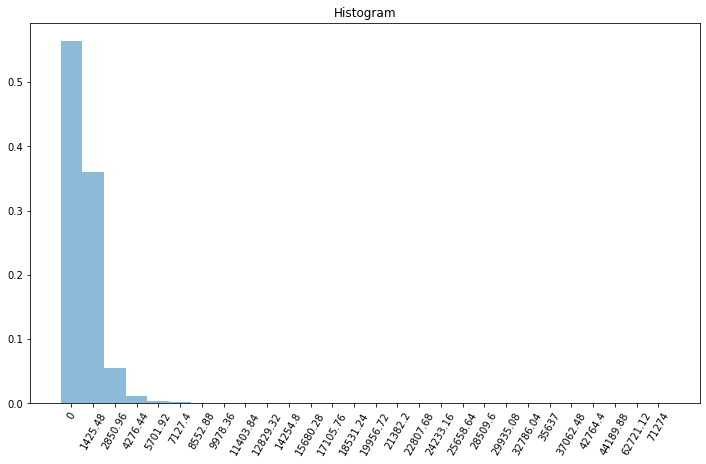

In [62]:
variable.histogram()

In [63]:
variable.describe()

avg                    1.564793e+03
max                    7.127400e+04
min                    0.000000e+00
sum                    3.398448e+08
range                  7.127400e+04
stdev                  1.098193e+03
q1                     8.670000e+02
q3                     1.490000e+03
median                 1.149000e+03
interquartile_range    6.230000e+02
dtype: float64

### Subscribe to a Dataset in the catalog

Once you have explored the catalog and have detected a dataset with the variables you need for your analysis and the right spatial resolution, you have to look at the `is_public_data` to know if you can just use it from CARTOframes or you first need to subscribe for a license.

Subscriptions to datasets allow you to use them from CARTOframes to enrich your own data or to download them. See the enrichment guides for more information about this.

Let's see the dataset and geography in our previous example:

In [64]:
dataset = Dataset.get('ags_sociodemogr_e92b1637')

In [65]:
dataset.is_public_data

False

In [66]:
from cartoframes.data.observatory import Geography
geography = Geography.get(dataset.geography)

In [67]:
geography.is_public_data

False

Both `dataset` and `geography` are not public data, that means you need a subscription to be able to use them to enrich your own data.

**To subscribe to data in the Data Observatory catalog you need a CARTO account with access to Data Observatory**

In [69]:
from cartoframes.auth import set_default_credentials
YOUR_CARTO_USER_NAME = 'cartoframes-testing'
YOUR_CARTO_API_KEY = '931150443b7aa3bb05d47c8e86b88ce8cbca3954'
set_default_credentials(username=YOUR_CARTO_USER_NAME, api_key=YOUR_CARTO_API_KEY)
dataset.subscribe()

HTML(value='\n    <h3>Subscription contract</h3>\n    You are about to subscribe to <b>carto-do.ags.demographi…

GridspecLayout(children=(Button(button_style='info', description='Yes', layout=Layout(grid_area='widget001', h…

In [70]:
geography.subscribe()

HTML(value='\n    <h3>Subscription contract</h3>\n    You are about to subscribe to <b>carto-do.ags.geography_…

GridspecLayout(children=(Button(button_style='info', description='Yes', layout=Layout(grid_area='widget001', h…

**Licenses to data in the Data Observatory grant you the right to use the data subscribed for the period of one year. Every dataset or geography you want to use to enrich your own data, as lons as they are not public data, require a valid license.**

You can check the actual status of your subscriptions directly from the catalog.

In [71]:
Catalog().subscriptions()

Datasets: None
Geographies: None

## About nested filters in the Catalog instance

**Note that every time you search the catalog you create a new instance of the `Catalog` class. Alternatively, when applying `country`, `category` and `geography` filters a catalog instance, you can reuse the same instance of the `catalog` by using the `catalog.clean_filters()` method.**

So for example, if you've filtered the catalog this way:

In [72]:
catalog = Catalog()
catalog.country('usa').category('demographics').datasets

[<Dataset.get('od_acs_181619a3')>,
 <Dataset.get('od_acs_38016c42')>,
 <Dataset.get('od_acs_1f614ee8')>,
 <Dataset.get('od_acs_c6bf32c9')>,
 <Dataset.get('od_acs_91ff81e3')>,
 <Dataset.get('od_acs_13345497')>,
 <Dataset.get('od_acs_87fa66db')>,
 <Dataset.get('od_acs_b98db80e')>,
 <Dataset.get('od_acs_9f4d1f13')>,
 <Dataset.get('od_acs_5b67fbbf')>,
 <Dataset.get('od_acs_29664073')>,
 <Dataset.get('od_acs_4bb9b377')>,
 <Dataset.get('od_acs_9df157a1')>,
 <Dataset.get('od_acs_550657ce')>,
 <Dataset.get('od_tiger_19a6dc83')>,
 <Dataset.get('od_acs_6e4b69f6')>,
 <Dataset.get('od_acs_1a22afad')>,
 <Dataset.get('od_acs_9510981d')>,
 <Dataset.get('od_acs_6d43ed82')>,
 <Dataset.get('od_acs_dc3cfd0f')>,
 <Dataset.get('od_acs_194c5960')>,
 <Dataset.get('od_acs_9a9c93b8')>,
 <Dataset.get('od_acs_7b2649a9')>,
 <Dataset.get('od_acs_478c37b8')>,
 <Dataset.get('od_acs_f98ddfce')>,
 <Dataset.get('od_acs_8b00f653')>,
 <Dataset.get('od_acs_d52a0635')>,
 <Dataset.get('od_acs_1deaa51')>,
 <Dataset.get('od_a

And now you want to take the `financial` datasets for the use, you should:

1. Create a new instance of the catalog: `catalog = Catalog()`
2. Call to `catalog.clean_filters()` over the existing instance.

Another point to remark is that, altough a recommended way to discover data is nesting filters over a `Catalog` instance, you don't need to follow the complete hierarchy (`country`, `category`, `geography`) to list the available datasets.

Alternatively, you can just list all the datasets in the `US` or list all the datasets for the `demographics` category, and continue exploring the catalog locally with pandas.

Let's see an example of that, in which we filter public data for the `demographics` category world wide:

In [73]:
df = Catalog().category('demographics').datasets.to_dataframe()
df[df['is_public_data'] == True]

available_in   category_id category_name country_id data_source_id  \
8           None  demographics  Demographics        usa            acs   
9           None  demographics  Demographics        usa            acs   
10          None  demographics  Demographics        usa            acs   
13          None  demographics  Demographics        usa            acs   
14          None  demographics  Demographics        usa            acs   
16          None  demographics  Demographics        usa            acs   
17          None  demographics  Demographics        usa            acs   
20          None  demographics  Demographics        usa            acs   
21          None  demographics  Demographics        usa            acs   
22          None  demographics  Demographics        usa            acs   
23          None  demographics  Demographics        usa            acs   
27          None  demographics  Demographics        usa            acs   
28          None  demographics  Demographics        usa            acs   
29          None  demographics  Demographics        usa            acs   
31          None  demographics  Demographics        usa          tiger   
34          None  demographics  Demographics        usa            acs   
39          None  demographics  Demographics        usa            acs   
52          None  demographics  Demographics        usa            acs   
53          None  demographics  Demographics        usa            acs   
57          None  demographics  Demographics        usa            acs   
85          None  demographics  Demographics        usa            acs   
90          None  demographics  Demographics        usa            acs   
91          None  demographics  Demographics        usa            acs   
92          None  demographics  Demographics        usa            acs   
93          None  demographics  Demographics        usa            acs   
96          None  demographics  Demographics        usa            acs   
97          None  demographics  Demographics        usa            acs   
98          None  demographics  Demographics        usa            acs   
99          None  demographics  Demographics        usa            acs   
100         None  demographics  Demographics        usa            acs   
..           ...           ...           ...        ...            ...   
408         None  demographics  Demographics        usa          tiger   
409         None  demographics  Demographics        usa            acs   
410         None  demographics  Demographics        usa            acs   
411         None  demographics  Demographics        usa            acs   
412         None  demographics  Demographics        usa            acs   
413         None  demographics  Demographics        usa            acs   
414         None  demographics  Demographics        usa            acs   
415         None  demographics  Demographics        usa            acs   
416         None  demographics  Demographics        usa            acs   
417         None  demographics  Demographics        usa            acs   
418         None  demographics  Demographics        usa            acs   
419         None  demographics  Demographics        usa          tiger   
420         None  demographics  Demographics        usa            acs   
422         None  demographics  Demographics        usa            acs   
423         None  demographics  Demographics        usa            acs   
432         None  demographics  Demographics        usa          tiger   
433         None  demographics  Demographics        usa          tiger   
434         None  demographics  Demographics        usa          tiger   
435         None  demographics  Demographics        usa            acs   
436         None  demographics  Demographics        usa            acs   
437         None  demographics  Demographics        usa          lodes   
438         None  demographics  Demographics        usa            acs   
439     

### Learn more

We recommend you to check also these resources if you want to know more about the Data Observatory catalog:

- The CARTOframes Enrichment guides and examples
- [our public website](https://carto.com/platform/location-data-streams/)
- Your user dashboard: Under the data section
- The CARTOframes catalog reference 